In [50]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"
from matplotlib import rcParams
rcParams["savefig.dpi"] = 200

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from gaia_kepler import data, tgas_match

Get the data and cross match:

In [11]:
# Crossmatch the KIC to TGAS
kic = data.KICatalog().df
kic_tgas = tgas_match(kic)

Compare the Kepler and Gaia magnitude systems:

[ 0.99598907 -0.08246494]


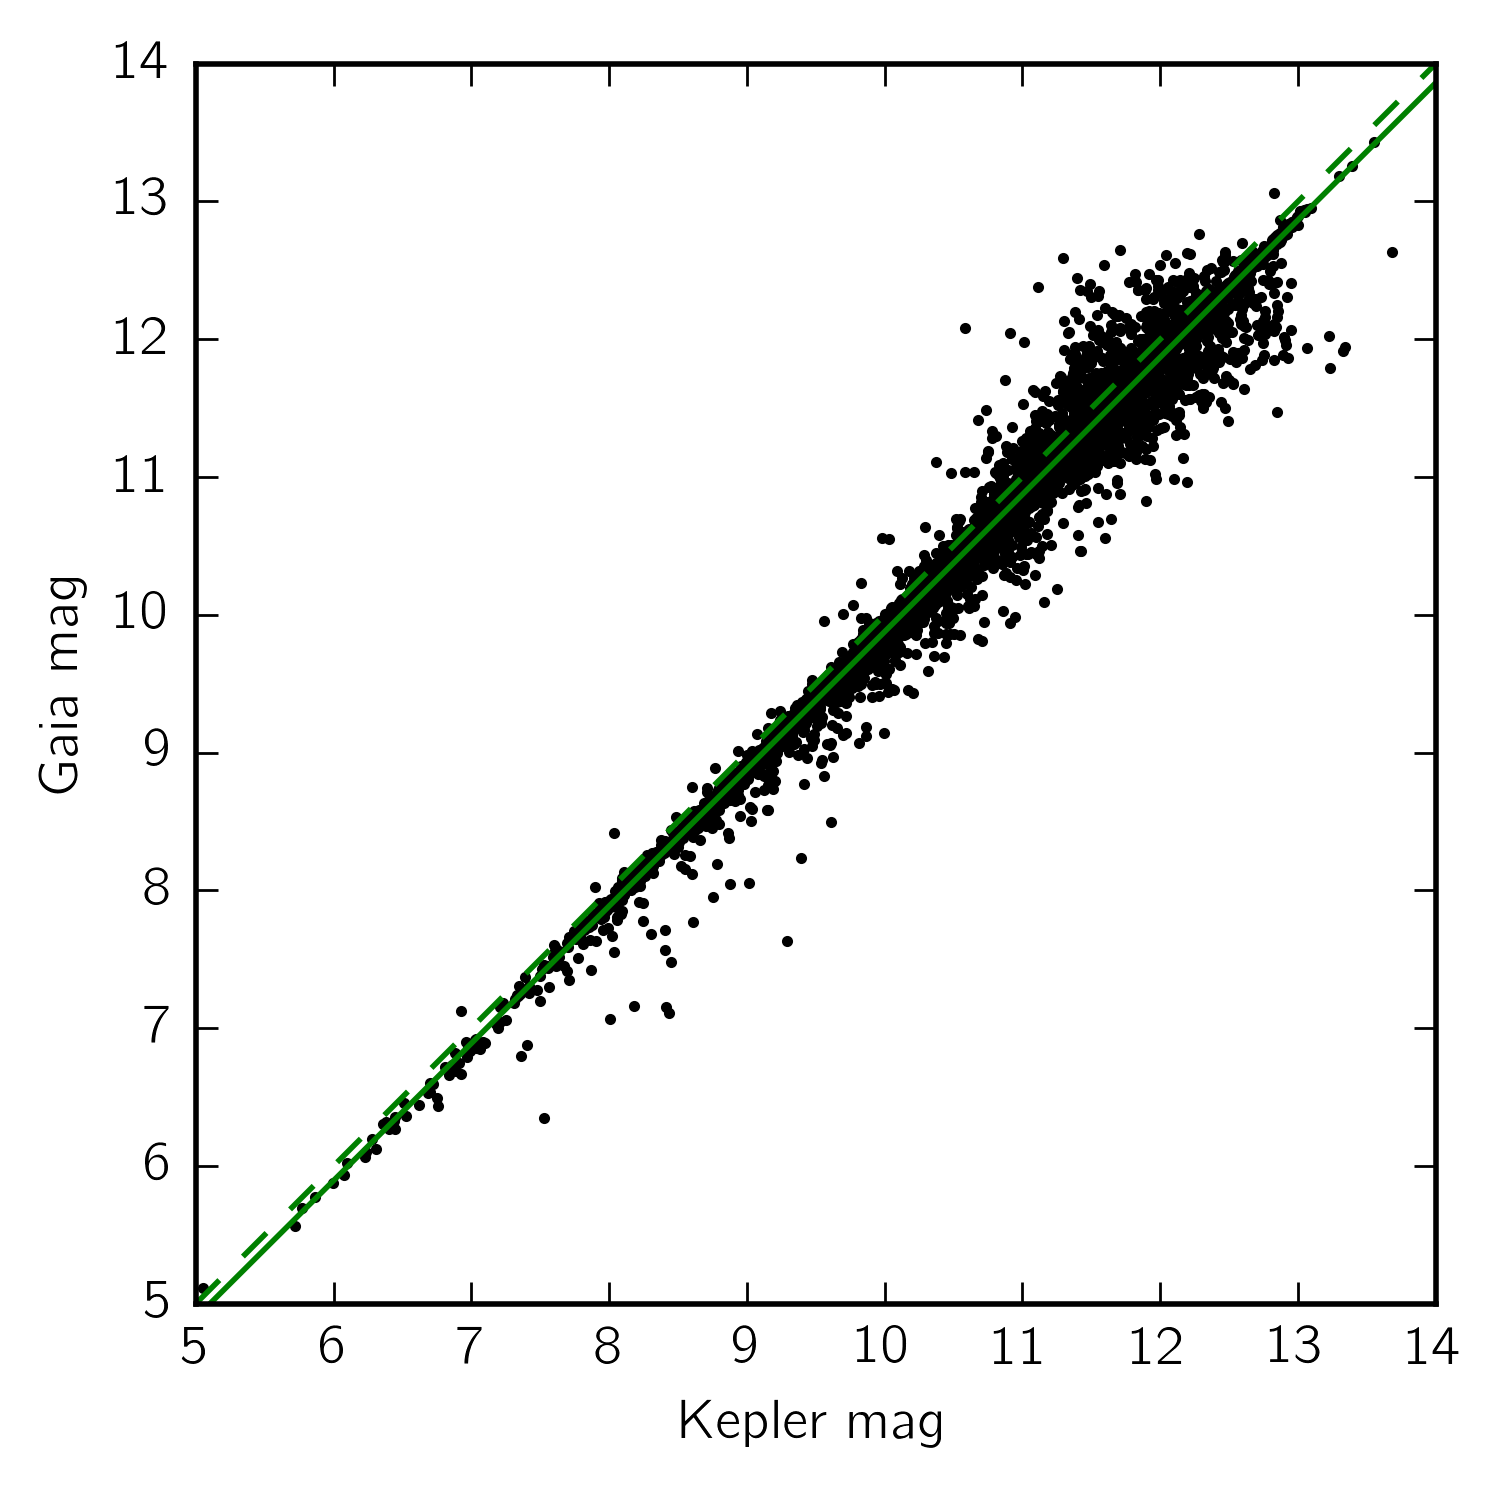

In [51]:
x = np.array(kic_tgas.kepmag)
y = np.array(kic_tgas.tgas_phot_g_mean_mag)
m = np.isfinite(x) & np.isfinite(y)
x, y = x[m], y[m]
A = np.vander(x, 2)
w = np.linalg.solve(np.dot(A.T, A), np.dot(A.T, y))
print(w)

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot(x, y, ".k", ms=3)
ax.plot([5, 14], [5, 14], "--g")
ax.plot([5, 14], np.dot(np.vander([5, 14], 2), w), "g")
ax.set_xlim(5, 14)
ax.set_ylim(5, 14)
ax.set_xlabel("Kepler mag")
ax.set_ylabel("Gaia mag");

Look at some exoplanet catalogs:

In [112]:
# Crossmatch the exoplanet catalogs to TGAS
planets = data.ExoplanetCatalog().df
planets_tgas = tgas_match(planets)

kois = data.KOICatalog().df
kois = kois[kois.koi_pdisposition == "CANDIDATE"]
kois_tgas = tgas_match(kois)

k2ois = data.K2CandidatesCatalog().df
k2ois = k2ois[np.isfinite(k2ois.ra)]  # Not sure why some rows are missing coordinates
k2ois_tgas = tgas_match(k2ois)

# Get the distances
tgas_distances = data.TGASDistancesCatalog().df
planets_tgas = pd.merge(planets_tgas, tgas_distances, left_on="tgas_source_id", right_on="SourceId")
kois_tgas = pd.merge(kois_tgas, tgas_distances, left_on="tgas_source_id", right_on="SourceId")
k2ois_tgas = pd.merge(k2ois_tgas, tgas_distances, left_on="tgas_source_id", right_on="SourceId")

In [113]:
def get_cartesian(cat):
    dist = np.array(cat.r50MW)
    ra = np.radians(np.array(cat.ra))
    dec = np.radians(np.array(cat.dec))
    return np.array([dist * np.cos(dec) * np.cos(ra),
                     dist * np.cos(dec) * np.sin(ra),
                     dist * np.sin(dec)]).T

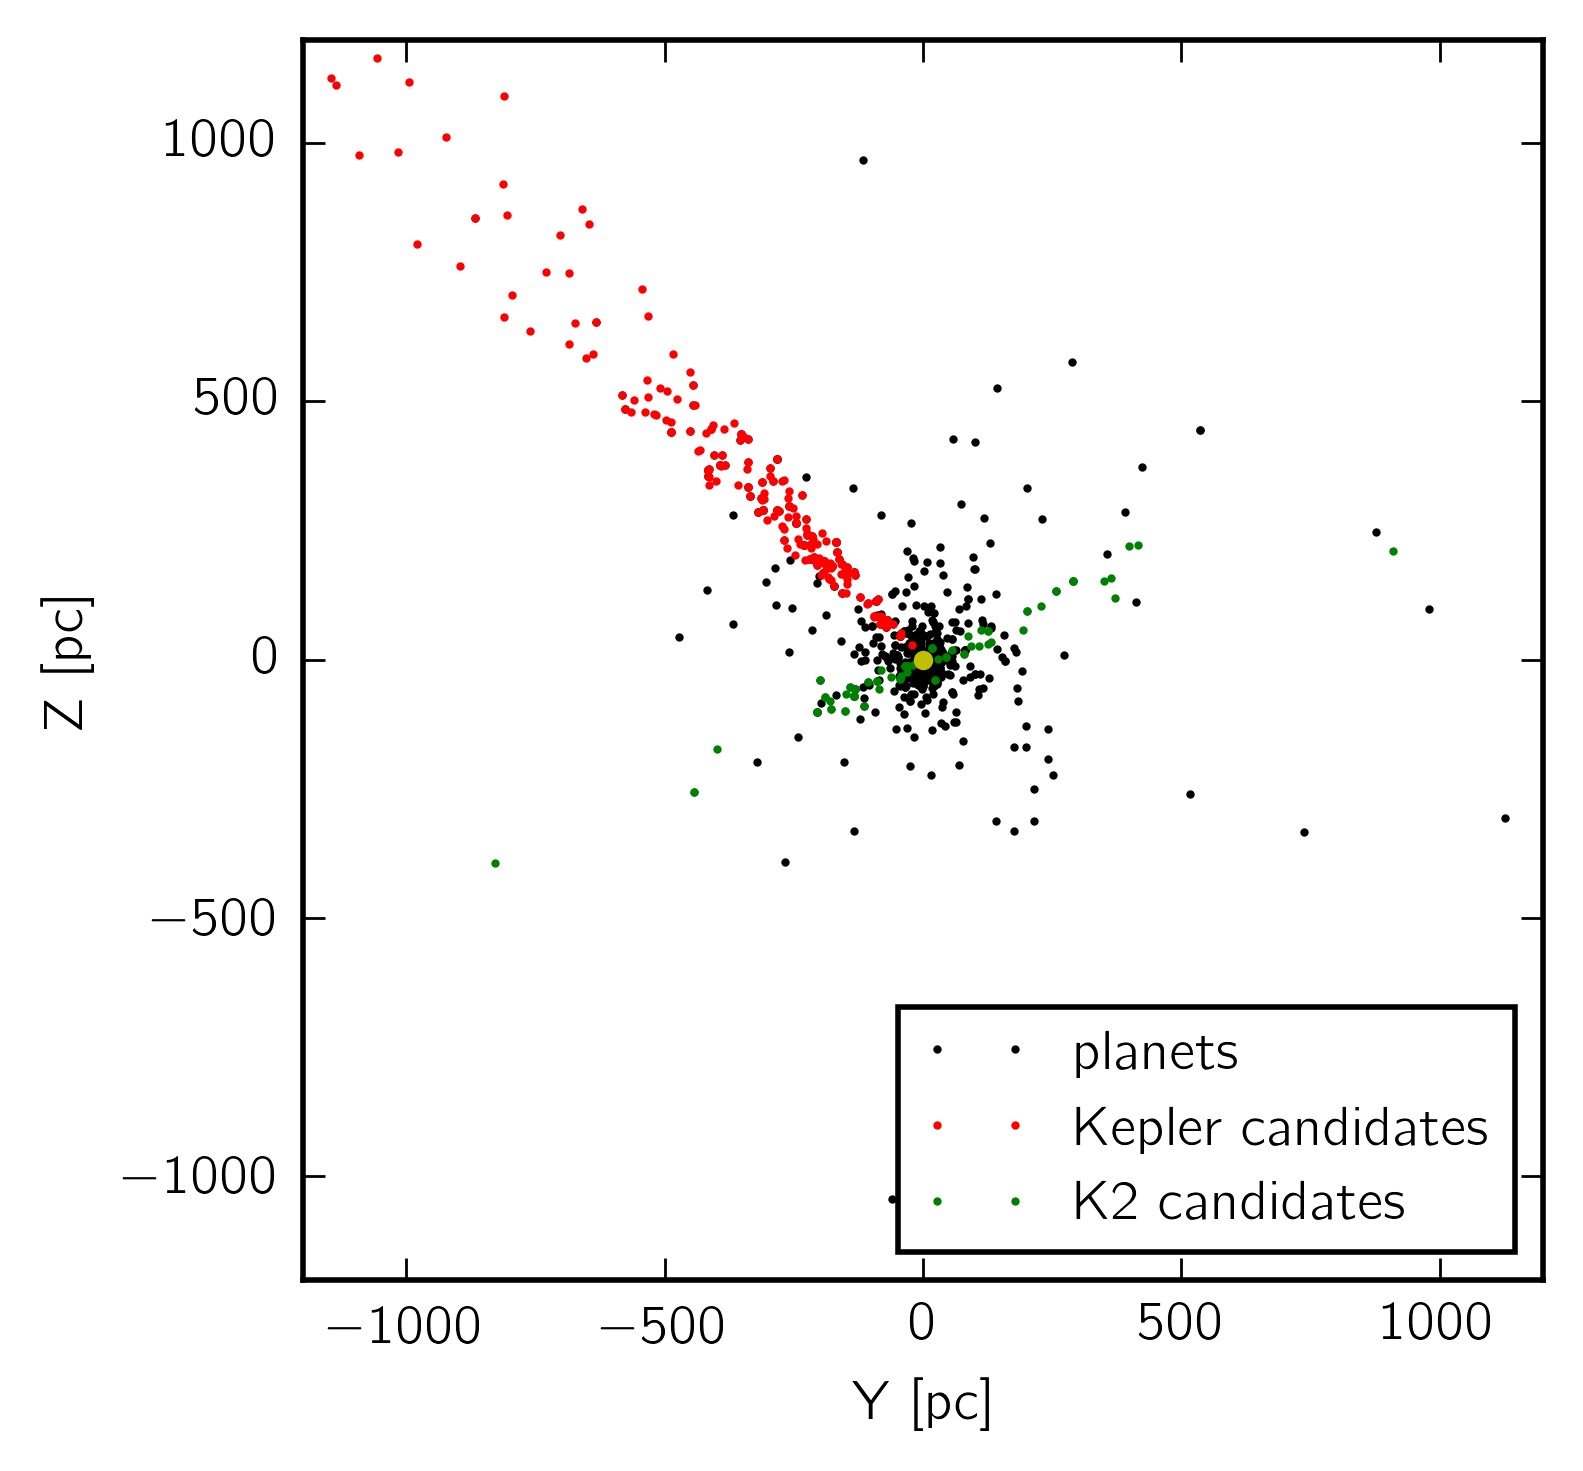

In [129]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

for coords, color, name in zip(map(get_cartesian, (planets_tgas, kois_tgas, k2ois_tgas)),
                               "krg", ("planets", "Kepler candidates", "K2 candidates")):
    ax.plot(coords[:, 1], coords[:, 2], ".", color=color, ms=2, label=name)
ax.plot(0, 0, ".y")
ax.legend(loc=4, fontsize=10)
ax.set_xlim(-1200, 1200)
ax.set_ylim(-1200, 1200)
ax.set_xlabel("Y [pc]")
ax.set_ylabel("Z [pc]");